## Regresion lineal multivariable

La regresión lineal múltiple es la gran técnica estadística para comprobar hipótesis y relaciones explicativas

In [1]:
# Importos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('./data/insurance.csv', header=0, sep=',')

print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

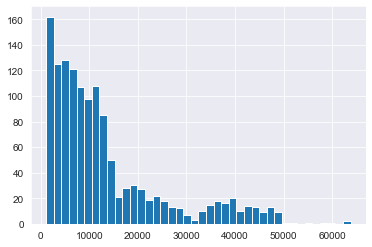

In [10]:
# Seleccionamos la columna, y realizamos un histograma con .hist()
df['charges'].hist(bins=40)

<AxesSubplot:>

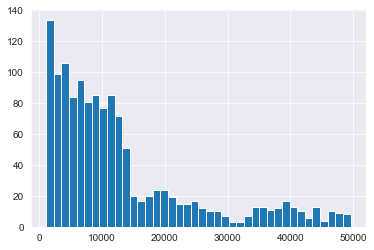

In [12]:
# Eliianndo los cargos < 50000, para este caso son datos atipicos
df = df[df['charges'] < 50000]
df['charges'].hist(bins=40)

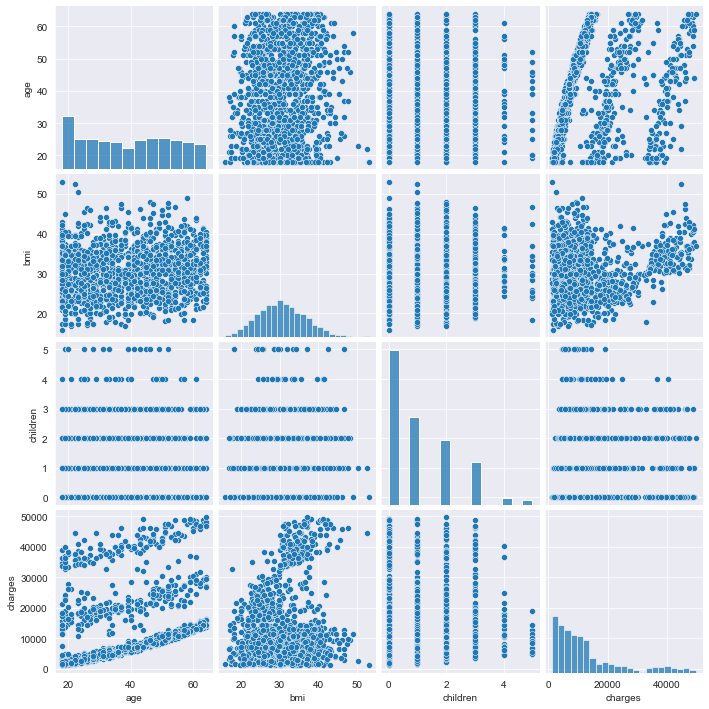

In [15]:
# Viendo correlaciones

# Usando seaborn para ver todas las distribuciones de variables numericas, y posiblemente identificar correlaciones
sns.pairplot(df, height=2.5)
plt.show()

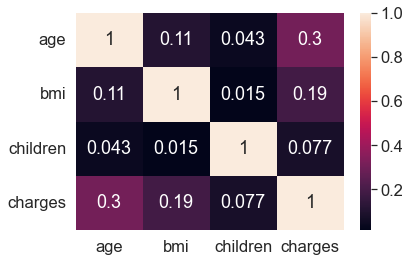

In [17]:
# Mapa de color
numeric_cols = ['age', 'bmi', 'children', 'charges']

sns.set(font_scale=1.5)
# Configuracion del heatmap
sns.heatmap(df[numeric_cols].corr(), cbar=True, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)
sns.set(font_scale=1.5)
plt.show()

### Mapeo de variables categoricas a numericas (Onw hot encoding)

#### Por que generar variables de 1 y 0, y no usar indices o llaves ya generadas ?

El problema con esta codificación es que la mayoría de los algoritmos tratan estos como valores numéricos y entonces puedes sesgar los resultados, imagina que el 49% de los datos son 1 y el 49% son 3 y el 1% es 2, entonces cuando el algoritmo haga las cuentas podría decir que la media es 2, pero esto no es así (además que no tiene mucho sentido hacer promedios con valores categóricos) En cambio lo que haces al crear columnas de 1s y 0s es Que los resultados se pueden ver como probabilidades, es decir, en la columna de southwest si el promedio es 0.6, quiere decir que southwest aparece en el 60% de todos los resultados. Yo es por esto y que he visto muchas veces en el primer método que mencionas, que ya no lo uso para mis algoritmos 😄

In [24]:
# get_dummies // permite generar valores enteros a variables categoricas
# drop_first // elimina una de las variables generadas, ya que no es necesaria generando redundancia en el analsiis
pd_with_dummies = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
pd_with_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
